# Premier League matches 2014–2020
#### **Scope: Sports**
    
     

**PROJECT DESCRIPTION:**

Football is very unpredictable, but coaches and managers might be able to increase the chances of winning through a strategic game plan and ability to maximize opponents’ weaknesses. The dataset for this project includes 6 top teams who took the premier league trophies between 2014 and 2020. See more about the provided dataset here

**INTRODUCTION**
So far, the implementation of statistics into soccer has been positive. Teams can easily gather information about their opponents and their tactics. This convenience allows managers to create well-thought out game plans that suit their team, maximize opponents' weaknesses, and increase their chances of winning.

A goal is scored when the whole of the ball passes over the goal line, between the goalposts and under the crossbar, provided that no offence has been committed by the team scoring the goal. If the goalkeeper throws the ball directly into the opponents' goal, a goal kick is awarded.

THE TIME OF SEASON/MOTIVATION: While a club battling for a league title is going to be hungry for a win, as is a side that is fighting to stay up, a club that has already won the title or has already been relegated is unlikely to work as hard, and often rest players as well.
THE REFEREE: Of course, when referee's send players off it make a massive impact on a match, but even if he is just awarding a yellow card then it can affect the outcome of the game as the player booked is less likely to go in as hard for the rest of the match.

SUBSTITUTES: The whole point of substitutes is for them to be able to come on and impact a match. Subs not only bring on a fresh pair of legs that are less tired than starters and more likely to track back and push forward, but can also play crucial roles in the formation of a team.

MIND GAMES/MANAGERS: Playing mind games has almost become a regular routine for top level managers, and rightly so. Just a simple mind game can do so much to impact a match, a good example coming from Sir Alex Ferguson.

Per his autobiography, when Manchester United were losing late on in a match at a certain point he would tap his watch and make sure to let the opposition know he is signalling this to his players. United's opposition already know that United have a tendency to come back from behind, and upon seeing this gesture they will think that United are going to come back. And because scientific studies prove that living creatures are more likely to accept things that have happened before than not - horses are more likely to lose to a horse they have already lost to in a race even if they are on an even playing field - they often succumb to a loss.

FORM/INJURIES/FIXTURES: A team on better form is more likely to win a match than if they have been on a poor run of form, while a team in the middle of a condensed run of fixtures is less likely to win than a well rested team.
These are just some of the things that affect matches - if you have any other just mention them in the comment section below and I'll try to add them in!

### Problem Statement

- Given a set of features about a team and their opponent will the team win, lose or draw?
- What factors should the team look out for?

#### Importing Necessary Libraries

In [1]:
from IPython.display import display

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
plt.style.use('seaborn-darkgrid')

from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import pickle 
import joblib

### Data Exploration

In [2]:
# Read in the Data
all_matches = pd.read_csv('matchesall2014-2020.csv', index_col=0)

# The first few rows of the data
all_matches.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Off Target Shots,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,5.0,5.0,14.0,4.0,4.0,29.0,86.0,20.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,5.0,1.0,0.0,23.0,80.0,10.0,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,5.0,5.0,10.0,0.0,6.0,24.0,80.0,16.0,15.0,18.0,3.0,0.0,0.0,2.0,2.0,7.0,3.0,3.0,19.0,75.0,15.0,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,5.0,3.0,11.0,3.0,3.0,12.0,77.0,27.0,37.0,16.0,1.0,0.0,0.0,5.0,3.0,13.0,5.0,6.0,17.0,84.0,14.0,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,10.0,4.0,18.0,4.0,8.0,15.0,83.0,15.0,35.0,12.0,2.0,1.0,0.0,2.0,4.0,10.0,4.0,5.0,16.0,80.0,12.0,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,7.0,6.0,19.0,6.0,8.0,22.0,77.0,30.0,40.0,10.0,1.0,0.0,0.0,3.0,4.0,11.0,4.0,9.0,26.0,76.0,15.0,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [3]:
# Display rows and columns of dataset
all_matches.shape

(2660, 40)

There are 2660 observations and 40 features in the dataset.

In [ ]:
# Drop Irrelevant Columns
all_matches = all_matches.drop(['Home Team Goals Conceeded',
                                'Away Team Goals Conceeded'],
                                axis=1)

all_matches.tail()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Off Target Shots,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,7.0,5.0,16.0,4.0,11.0,14.0,88.0,7.0,10.0,10.0,0.0,0.0,0.0,3.0,1.0,5.0,1.0,3.0,5.0,86.0,2.0,18.0,8.0,0.0,0.0,0.0,2,0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,7.0,3.0,12.0,2.0,8.0,14.0,69.0,40.0,31.0,11.0,3.0,0.0,0.0,3.0,3.0,10.0,4.0,9.0,23.0,73.0,44.0,19.0,1.0,1.0,0.0,0.0,1,0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,2.0,6.0,10.0,2.0,8.0,25.0,76.0,11.0,13.0,9.0,0.0,0.0,0.0,2.0,4.0,11.0,5.0,7.0,27.0,81.0,14.0,13.0,8.0,2.0,0.0,0.0,2,4,2020
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,6.0,7.0,14.0,1.0,2.0,22.0,68.0,18.0,13.0,5.0,0.0,0.0,0.0,8.0,5.0,17.0,4.0,3.0,21.0,80.0,11.0,9.0,9.0,3.0,0.0,0.0,3,0,2020
2659,LEEDS UTD,WEST BROM,3-1,2-0,7.0,7.3,5.0,64,36,3.0,9.0,17.0,5.0,8.0,19.0,82.0,17.0,11.0,12.0,2.0,0.0,0.0,6.0,5.0,14.0,3.0,3.0,16.0,71.0,10.0,17.0,12.0,1.0,0.0,0.0,3,1,2020


In [4]:
# Get Basic information about the dataset
all_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2660 entries, 0 to 2659
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Home Team                      2660 non-null   object 
 1   Away Team                      2660 non-null   object 
 2   Score                          2660 non-null   object 
 3   Half Time Score                2660 non-null   object 
 4   Match Excitement               2660 non-null   float64
 5   Home Team Rating               2660 non-null   float64
 6   Away Team Rating               2660 non-null   float64
 7   Home Team Possession %         2660 non-null   int64  
 8   Away Team Possession %         2660 non-null   int64  
 9   Home Team Off Target Shots     2660 non-null   float64
 10  Home Team On Target Shots      2660 non-null   float64
 11  Home Team Total Shots          2660 non-null   float64
 12  Home Team Blocked Shots        2660 non-null   f

In [5]:
# Check the columns
all_matches.columns

Index(['Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
       'Hom

In [6]:
# Checking for Missing Values
all_matches.isnull().sum()

Home Team                        0
Away Team                        0
Score                            0
Half Time Score                  0
Match Excitement                 0
Home Team Rating                 0
Away Team Rating                 0
Home Team Possession %           0
Away Team Possession %           0
Home Team Off Target Shots       0
Home Team On Target Shots        0
Home Team Total Shots            0
Home Team Blocked Shots          0
Home Team Corners                0
Home Team Throw Ins              0
Home Team Pass Success %         0
Home Team Aerials Won            0
Home Team Clearances             0
Home Team Fouls                  0
Home Team Yellow Cards           0
Home Team Second Yellow Cards    0
Home Team Red Cards              0
Away Team Off Target Shots       0
Away Team On Target Shots        0
Away Team Total Shots            0
Away Team Blocked Shots          0
Away Team Corners                0
Away Team Throw Ins              0
Away Team Pass Succe

There is no missing values in the dataset

In [7]:
# Check number of matches in each year
all_matches.groupby('year').year.count().to_frame()

,year
year,
2014,380
2015,380
2016,380
2017,380
2018,380
2019,380
2020,380


In [8]:
# Number of Teams
num_teams = all_matches['Home Team'].nunique()

print(f"There are {num_teams} teams featured in the seven seasons Premier League dataset")

There are 31 teams featured in the seven seasons Premier League dataset


## Exploratory Data Analysis (EDA)

In [9]:
# Show numerical data of the dataset
all_matches.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Match Excitement,2660.0,5.348571,1.693194,1.7,4.1,5.3,6.4,10.0
Home Team Rating,2660.0,6.476692,0.995476,2.4,5.8,6.5,7.1,10.0
Away Team Rating,2660.0,6.238797,0.990078,1.3,5.6,6.2,6.9,10.0
Home Team Possession %,2660.0,51.321429,12.403523,18.0,42.0,51.0,61.0,83.0
Away Team Possession %,2660.0,48.678571,12.403523,17.0,39.0,49.0,58.0,82.0
Home Team Off Target Shots,2660.0,5.378947,2.731567,0.0,3.0,5.0,7.0,16.0
Home Team On Target Shots,2660.0,4.670677,2.622373,0.0,3.0,4.0,6.0,17.0
Home Team Total Shots,2660.0,13.858271,5.668131,0.0,10.0,13.0,17.0,43.0
Home Team Blocked Shots,2660.0,3.818045,2.549099,0.0,2.0,3.0,5.0,19.0
Home Team Corners,2660.0,5.776316,3.121093,0.0,3.0,5.0,8.0,19.0


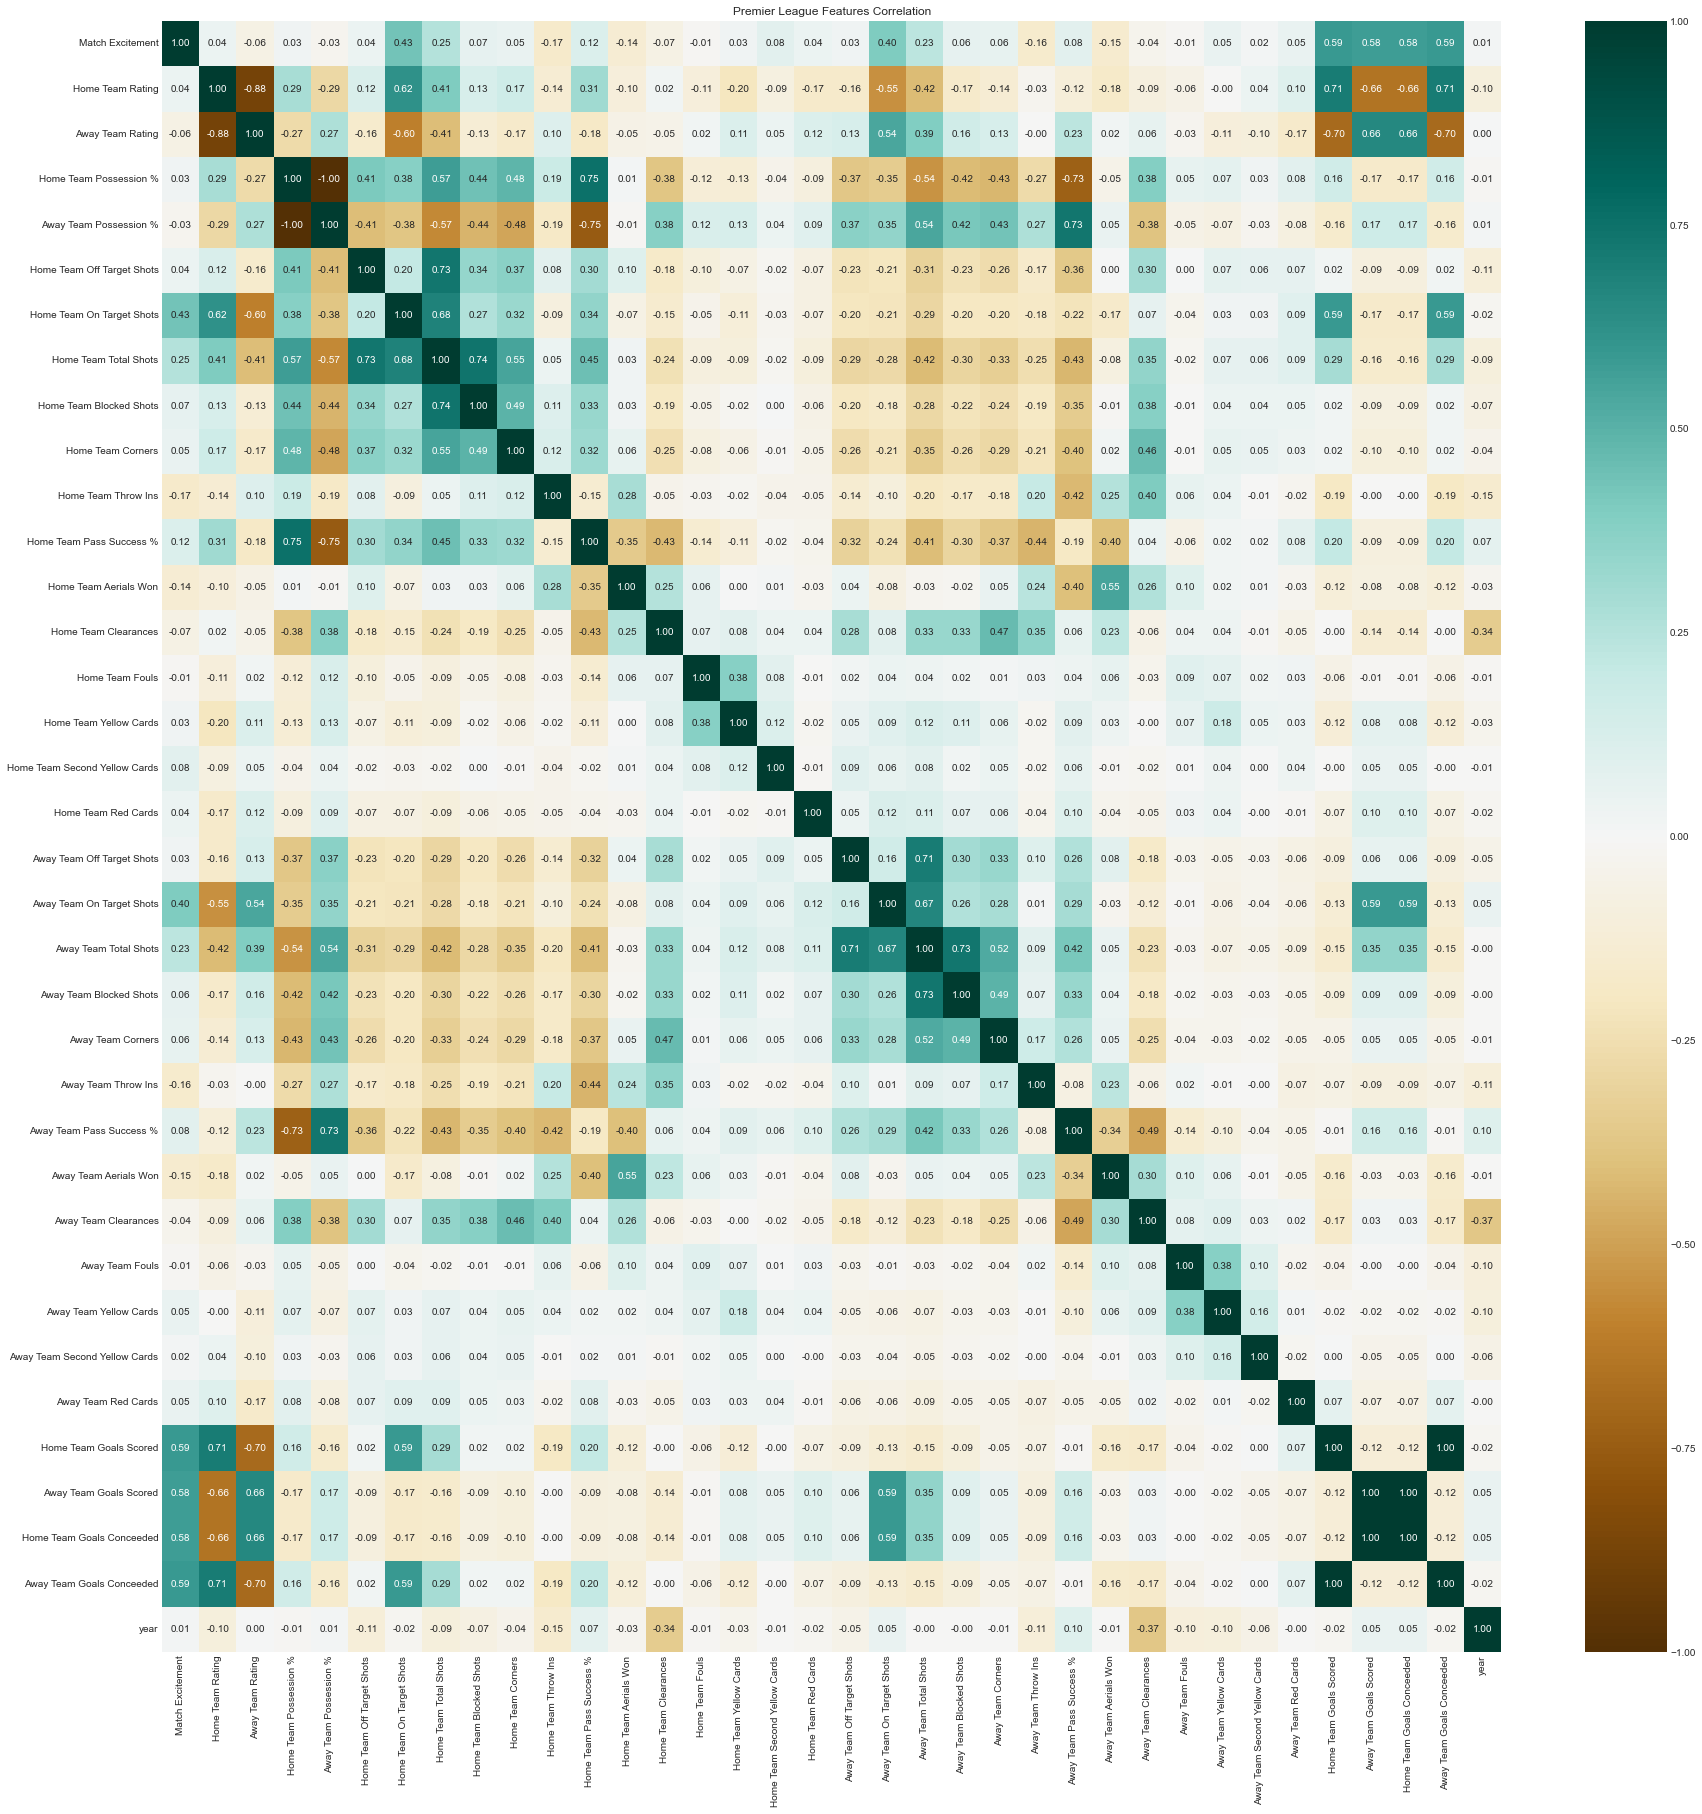

In [30]:
# A look at the correlation data
fig, ax = plt.subplots(figsize=(30,30))
correlation = all_matches.corr()
sns.heatmap(correlation, cmap='BrBG', annot=True, fmt='.2f')
plt.title('Premier League Features Correlation')
plt.show();

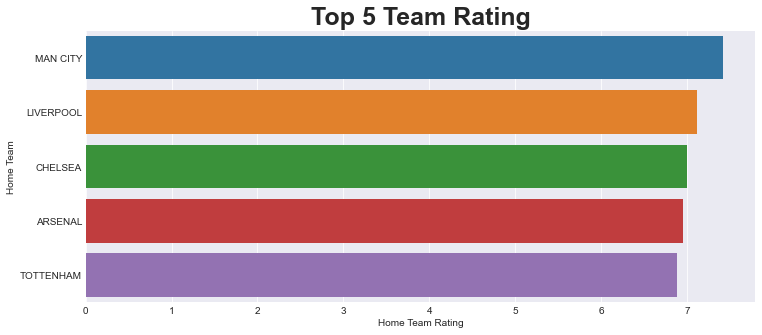

In [58]:
# The Top 5 best Home Team record i.e checking their points which is synonymous to rating
team_rating = all_matches.groupby("Home Team")['Home Team Rating']\
            .mean()\
            .sort_values(ascending=False)\
            .head(5).to_frame().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(y='Home Team', x='Home Team Rating', data=team_rating, ci=None, orient='h')
plt.title('Top 5 Team Rating', fontdict={'weight': 'bold', 'size': 25})
plt.show();

#### HOME TEAM

From Correlation table above, It is observed that there is more positive correlation in Home Team Rating, Home Team On Target shots, Match excitement with Home Team Goals Scored.

Visualizing Correlation between these features variable.

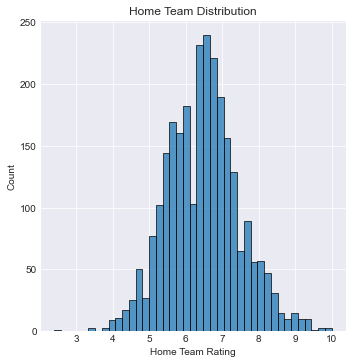

In [59]:
# Show dist plot
sns.displot(x='Home Team Rating', data=all_matches)
plt.title('Home Team Distribution')
plt.show();

#### AWAY TEAM
There is more positive correlation in Away Team Rating, Away Team On Target shots, Match excitement, Away Team Goals Scored and negative correlation in Home Team rating to Away Team Goals Scored.

Visualizing Correlation between these features variable.

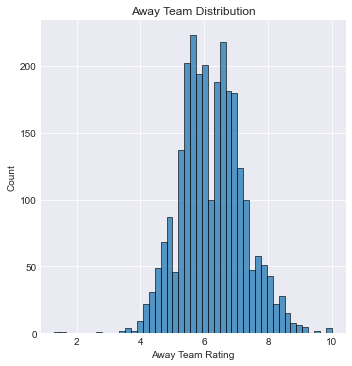

In [56]:
# Show dist plot
sns.displot(x='Away Team Rating', data=all_matches)
plt.title('Away Team Distribution')
plt.show();

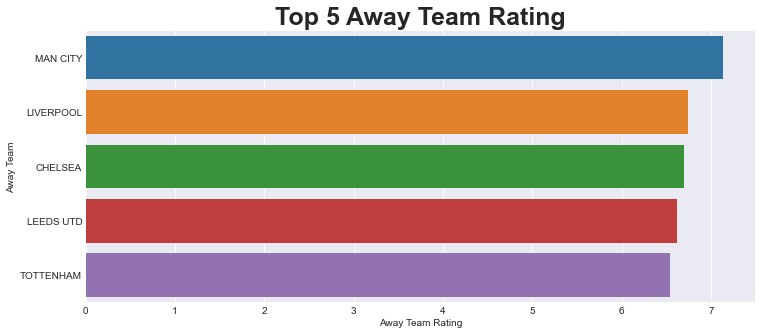

In [57]:
# The Top 5 best Home Team record i.e checking their points which is synonymous to rating
away_rating = all_matches.groupby("Away Team")['Away Team Rating']\
            .mean()\
            .sort_values(ascending=False)\
            .head(5).to_frame().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(y='Away Team', x='Away Team Rating', data=away_rating, ci=None, orient='h')
plt.title('Top 5 Away Team Rating', fontdict={'weight': 'bold', 'size': 25})
plt.show();

## Feature Engineering

In [60]:
# Label Encoding
# MIGHT WANT TO PICKLE `team_encoding` in case of production
import pickle
team_encoding = {team: i
                 for i, team in enumerate(all_matches['Home Team'].unique())}
reverse_team_encoding = {i: team
                         for team, i in team_encoding.items()}


with open('team_code.pickle', 'wb') as handle:
    pickle.dump(team_encoding, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('team_reverse_code.pickle', 'wb') as handle:
    pickle.dump(reverse_team_encoding, handle, protocol=pickle.HIGHEST_PROTOCOL)


## HELPER FUNCTIONS
def apply_transorm_dev(all_matches, dev=True):
  """Carries out all needed transforms on the all_matches"""
  # LabelEncode using a dictionary collection

  def who_won(score):
    """Determine the outcome of the match: 
    
        home_win, draw, away_win
    """
    home, away= score.split('-')

    if int(home) > int(away):
      return 'home_win'
    elif int(home) == int(away):
      return 'draw'
    else:
      return 'away_win'


  def who_leads(score):
    """Checks for half time result"""
    home, away= score.split('-')

    if int(home) > int(away):
      return 'home_leads'
    elif int(home) == int(away):
      return 'draw'
    else:
      return 'away_leads'

  def lead_margin(score):
    """Check for half time lead margin"""
    home, away= score.split('-')
    return abs(int(home) - int(away))
  

  all_matches['who_won'] = all_matches['Score'].apply(who_won)
  all_matches['who_leads'] = all_matches['Half Time Score'].apply(who_leads)
  all_matches['lead_margin'] = all_matches['Half Time Score'].apply(lead_margin)
  all_matches['Home Code'] = all_matches['Home Team'].map(lambda x: team_encoding[x])
  all_matches['Away Code'] = all_matches['Away Team'].map(lambda x: team_encoding[x])

  
  # Pick out 5 examples
  test_sample = all_matches[all_matches['year'] == 2020].sample(n=5, random_state=1)

  all_matches = all_matches.drop(test_sample.index).reset_index(drop=True)

  return all_matches, test_sample


def extract_X_y_dev(all_matches) :
  """Extract the Dependent and Independent Variables"""

  # Independent Variables
  X = all_matches[['Home Code', 'Away Code', 'Home Team Rating', 'Home Team Possession %', 
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Rating', 'Away Team Possession %',
       'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Match Excitement', 'who_leads', 'lead_margin', 'year']]

  X = pd.get_dummies(X, columns=['who_leads'], drop_first=True)

  # Dependent Variables
  y = all_matches[['who_won', 'year']]

  return X, y

# SPLIT DATASET BY YEAR
def split_data(X, y):
  """Splits the dataset by year"""
  X_train = X[~(X['year'] == 2020)]
  X_test = X[X['year'] == 2020]

  y_train = y[~(y['year'] == 2020)]
  y_test = y[y['year'] == 2020]

  # Drop year column
  X_train = X_train.drop('year', axis=1)
  X_test = X_test.drop('year', axis=1)
  y_train = y_train.drop('year', axis=1)
  y_test = y_test.drop('year', axis=1)

  # Reshape target variable
  y_train = y_train.values.reshape(y_train.shape[0],)
  y_test = y_test.values.reshape(y_test.shape[0],)

  return X_train, X_test, y_train, y_test


In [61]:
# Apply Development Transformation
all_matches, test_sample = apply_transorm_dev(all_matches)

# Save a test sample
# test_sample.to_csv('test_games_5_result.csv')
test_sample.to_excel('test_games_5_result.xlsx', sheet_name='test_games_5')

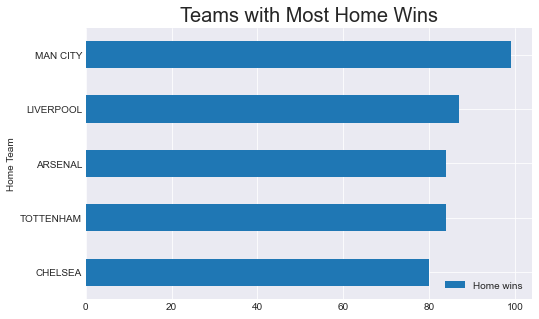

In [64]:
# Teams with Most Home Wins
fig, ax = plt.subplots(figsize=(8, 5))
all_matches[all_matches['who_won'] == 'home_win']\
  .groupby('Home Team')\
  .who_won.count().to_frame().sort_values('who_won', ascending=False)\
  .rename(columns={'who_won': 'Home wins'}).head()\
  .sort_values('Home wins')\
  .plot(kind='barh', ax=ax)
plt.title('Teams with Most Home Wins', fontsize=20)
plt.show()

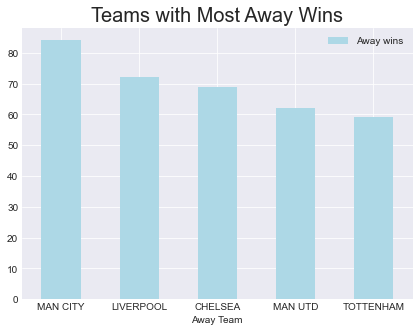

In [70]:
# Teams with Most Away Wins
fig, ax = plt.subplots(figsize=(7, 5))
all_matches[all_matches['who_won'] == 'away_win']\
  .groupby('Away Team')\
  .who_won.count().to_frame().sort_values('who_won', ascending=False)\
  .rename(columns={'who_won': 'Away wins'}).head()\
  .plot(kind='bar',
        ax=ax, color='lightblue')
plt.title('Teams with Most Away Wins', fontsize=20)
plt.xticks(rotation=0)
plt.show()

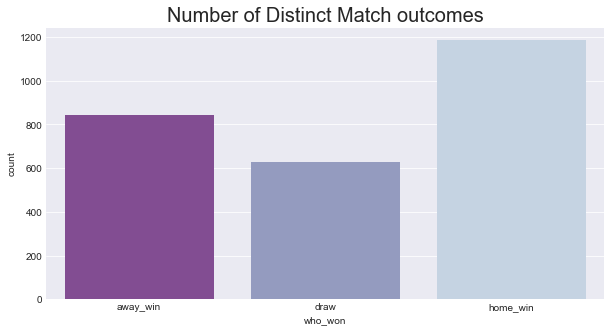

In [79]:
# Number of distinct outcomes
plt.figure(figsize=(10,5))
sns.countplot(x='who_won', palette='BuPu_r', data=all_matches)
plt.title('Number of Distinct Match outcomes', fontsize=20)
plt.show();

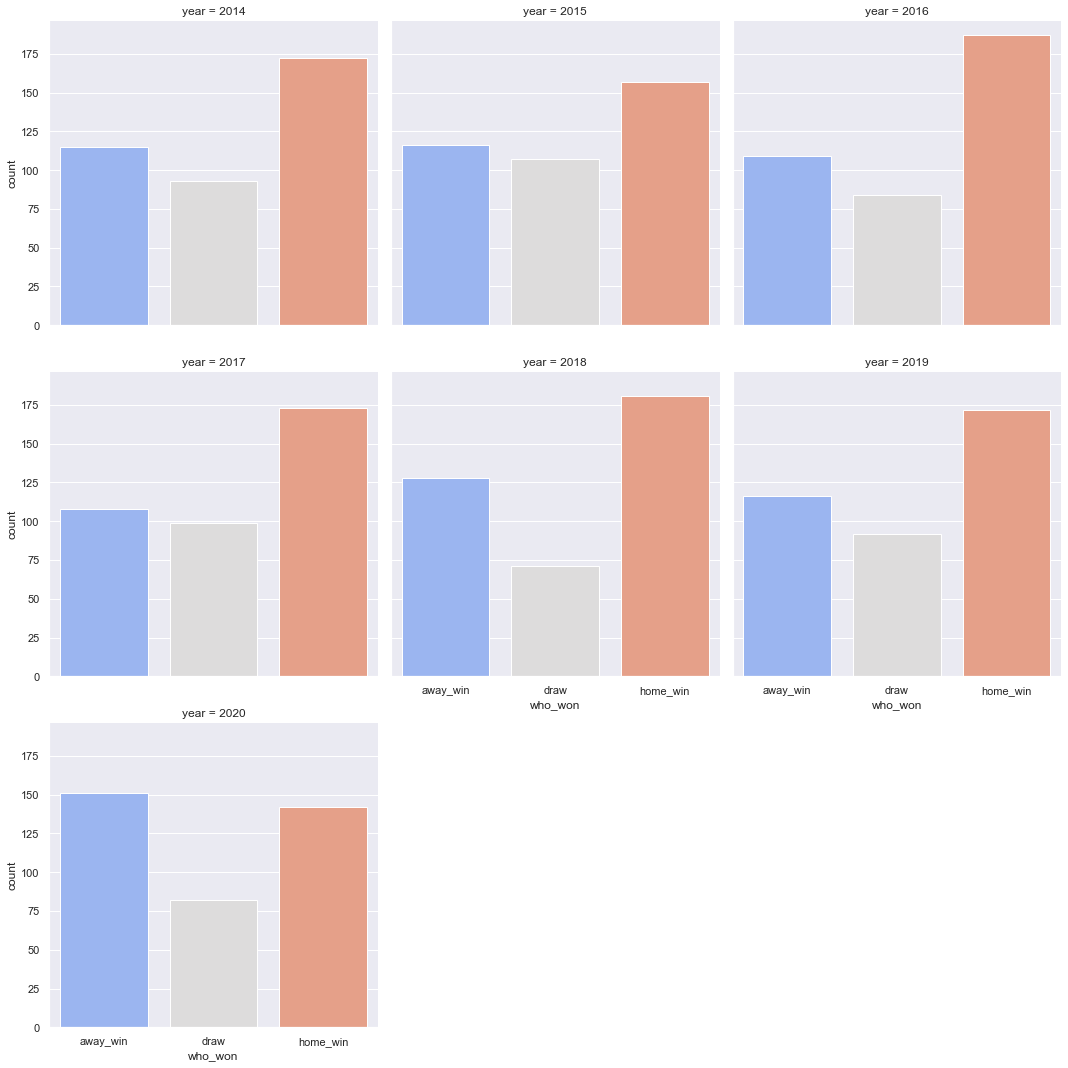

In [95]:
# Plot the home_win, away_win and draws in the respective years
fig = sns.catplot(x="who_won", data=all_matches, col = "year", kind='count', col_wrap=3, palette='coolwarm')
plt.show()

- ***No Home Advantage in 2020*** 😰

#### Feature Selection

In [82]:
# Apply `transormer_function_train` to entire_dataset

X, y = extract_X_y_dev(all_matches)
X_train, X_test, y_train, y_test = split_data(X, y)


In [83]:
X_train.tail()

,Home Code,Away Code,Home Team Rating,Home Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Rating,Away Team Possession %,Away Team Off Target Shots,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Match Excitement,lead_margin,who_leads_draw,who_leads_home_leads
2275,13,29,7.1,73,3.0,4.0,13.0,6.0,9.0,24.0,86.0,15.0,8.0,9.0,0.0,0.0,0.0,5.1,27,0.0,3.0,5.0,2.0,1.0,9.0,62.0,22.0,35.0,16.0,1.0,0.0,0.0,5.5,1,0,0
2276,14,16,6.5,47,9.0,2.0,13.0,2.0,7.0,31.0,80.0,16.0,12.0,11.0,3.0,0.0,0.0,6.9,53,3.0,2.0,7.0,2.0,2.0,24.0,83.0,12.0,16.0,13.0,2.0,0.0,0.0,4.4,1,0,0
2277,19,20,9.0,74,12.0,10.0,31.0,9.0,9.0,17.0,92.0,8.0,5.0,7.0,1.0,0.0,0.0,4.3,26,1.0,4.0,5.0,0.0,0.0,13.0,71.0,7.0,26.0,4.0,1.0,0.0,0.0,7.5,2,0,1
2278,8,7,5.2,25,1.0,2.0,3.0,0.0,2.0,18.0,65.0,15.0,22.0,11.0,1.0,0.0,0.0,7.5,75,5.0,6.0,14.0,3.0,4.0,30.0,89.0,15.0,8.0,5.0,0.0,0.0,0.0,6.0,0,1,0
2279,6,22,6.2,51,4.0,5.0,13.0,4.0,4.0,9.0,82.0,14.0,21.0,9.0,3.0,0.0,0.0,5.4,49,7.0,6.0,19.0,6.0,8.0,24.0,83.0,23.0,6.0,12.0,3.0,0.0,0.0,8.1,2,0,1


#### Modelling

- Label Encoding of Target Variable
- Model Fitting and Evaluation

In [84]:
# Encode the Target Variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
print(le.classes_)
## le.inverse_transform

print(y_train_encoded[:10])

le.inverse_transform(y_train_encoded[:10])

# SAVE IT
with open('le_classes.pickle', 'wb') as handle:
    pickle.dump(list(le.classes_), handle, protocol=pickle.HIGHEST_PROTOCOL)

['away_win' 'draw' 'home_win']
[0 1 1 0 0 0 2 2 0 0]


In [85]:
# Fit Data to Model
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train_encoded)

# Make prediction
y_pred = rf_clf.predict(X_test)
print(rf_clf.score(X_train, y_train_encoded))
print(rf_clf.score(X_test, y_test_encoded))


# Classification Report and Confusion Matrix
rf_report = classification_report(y_test_encoded, y_pred, output_dict=True)
conf_mat = confusion_matrix(y_test_encoded, y_pred)

1.0
0.888


In [86]:
rf_report = pd.DataFrame(rf_report).T

rf_report

,precision,recall,f1-score,support
0,0.916129,0.940397,0.928105,151.000
1,0.805970,0.658537,0.724832,82.000
2,0.895425,0.964789,0.928814,142.000
accuracy,0.888000,0.888000,0.888000,0.888
macro avg,0.872508,0.854574,0.860583,375.000
weighted avg,0.884201,0.888000,0.883924,375.000


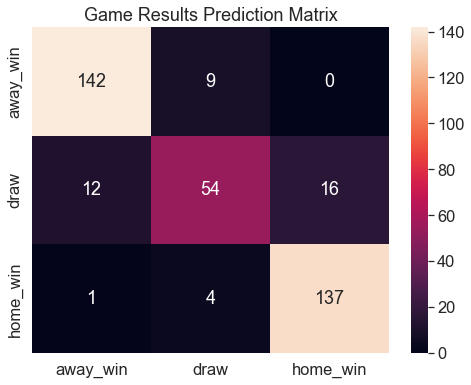

In [87]:
conf_mat = pd.DataFrame(conf_mat, index=le.classes_, columns=le.classes_)

sns.set(font_scale=1.5)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title('Game Results Prediction Matrix')
plt.show()

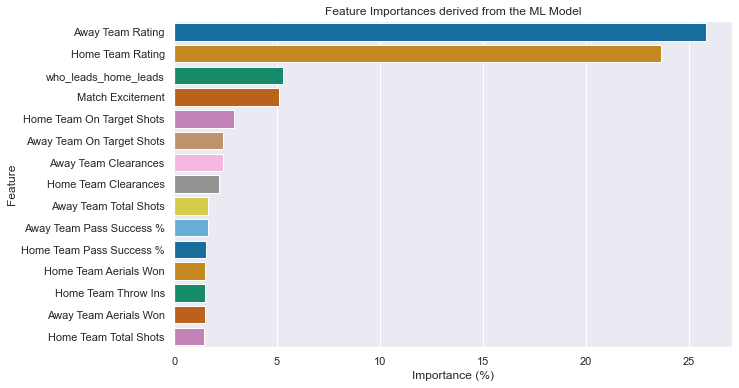

In [88]:
## PLOT THE FEATURE IMPORTANCE
"""
Feature Importance refers to techniques that calculate a score
for all the input features for a given model
— the scores simply represent the “importance” of each feature
"""

importances_df = pd.Series(rf_clf.feature_importances_ * 100, list(X_train.columns)).to_frame()

top_15_importances = importances_df.reset_index().rename(columns ={
                              'index': 'Feature',
                              0: 'Importance (%)'  
                            }).sort_values('Importance (%)', ascending=False).head(15)
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x="Importance (%)", data=top_15_importances, palette='colorblind')
plt.title('Feature Importances derived from the ML Model')
plt.show()

In [89]:
# Save the Model
filename = "soccer_forest.sav"
joblib.dump(rf_clf, filename)

['soccer_forest.sav']

#### PRODUCTION THOUGHTS

In [90]:
expected_input = ['Home Team', 'Away Team', 'Half Time Score', 'Home Team Rating',
       'Home Team Possession %', 'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Rating', 'Away Team Possession %',
       'Away Team Off Target Shots', 'Away Team On Target Shots',
       'Away Team Total Shots', 'Away Team Blocked Shots', 'Away Team Corners',
       'Away Team Throw Ins', 'Away Team Pass Success %',
       'Away Team Aerials Won', 'Away Team Clearances', 'Away Team Fouls',
       'Away Team Yellow Cards', 'Away Team Second Yellow Cards',
       'Away Team Red Cards', 'Match Excitement']

In [91]:
test_sample = test_sample[expected_input]

In [92]:
ex1 = list(test_sample.iloc[0].values)

pd.DataFrame(ex1, index = expected_input).T

,Home Team,Away Team,Half Time Score,Home Team Rating,Home Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Rating,Away Team Possession %,Away Team Off Target Shots,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Match Excitement
0,FULHAM,SHEFFIELD UTD,0-0,6.7,65,6.0,6.0,15.0,3.0,6.0,22.0,83.0,25.0,19.0,11.0,1.0,0.0,0.0,5.4,35,2.0,2.0,4.0,0.0,4.0,30.0,66.0,28.0,23.0,14.0,2.0,0.0,0.0,3.1


In [93]:
# HELPER FUNCTION
def apply_transform_prod(sample, team_encoding):
  """
  Carries out all needed transforms on the sample
  
  input: sample -> list or numpy array
  output: sample_df -> dataframe object
  """

  def lead_margin(score):
    """Check for half time lead margin"""
    home, away= score.split('-')
    return abs(int(home) - int(away))


  sample_df = pd.DataFrame(sample, 
                           index = ['Home Team', 'Away Team', 'Half Time Score', 'Home Team Rating',
       'Home Team Possession %', 'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Rating', 'Away Team Possession %',
       'Away Team Off Target Shots', 'Away Team On Target Shots',
       'Away Team Total Shots', 'Away Team Blocked Shots', 'Away Team Corners',
       'Away Team Throw Ins', 'Away Team Pass Success %',
       'Away Team Aerials Won', 'Away Team Clearances', 'Away Team Fouls',
       'Away Team Yellow Cards', 'Away Team Second Yellow Cards',
       'Away Team Red Cards', 'Match Excitement']).T

  sample_df['who_leads_draw'] = 0
  sample_df['who_leads_home_leads'] = 0


  for i, score in sample_df['Half Time Score'].items():
    home, away = score.split('-')

    if int(home) > int(away):
      sample_df.loc[i, 'who_leads_home_leads'] = 1
    elif int(home) == int(away):
      sample_df.loc[i, 'who_leads_draw'] = 1
    else:
      pass  

  sample_df['lead_margin'] = sample_df['Half Time Score'].apply(lead_margin)
  sample_df['Home Code'] = sample_df['Home Team'].map(lambda x: team_encoding[x])
  sample_df['Away Code'] = sample_df['Away Team'].map(lambda x: team_encoding[x])

  X_sample = sample_df[['Home Code', 'Away Code', 'Home Team Rating', 'Home Team Possession %', 
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Rating', 'Away Team Possession %',
       'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Match Excitement', 'lead_margin', 'who_leads_draw', 'who_leads_home_leads']]



  return X_sample

In [94]:
# Load Model
loaded_model = joblib.load('soccer_forest.sav')

# Load team code and team_reverse_code and le_classes
with open('team_code.pickle', 'rb') as handle:
    team_code= pickle.load(handle)

with open('team_reverse_code.pickle', 'rb') as handle:
    team_reverse_code= pickle.load(handle)

with open('le_classes.pickle', 'rb') as handle:
    le_classes= pickle.load(handle)

example = apply_transform_prod(ex1, team_code)

In [ ]:
example

,Home Code,Away Code,Home Team Rating,Home Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Rating,Away Team Possession %,Away Team Off Target Shots,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Match Excitement,lead_margin,who_leads_draw,who_leads_home_leads
0,16,24,6.6,44,6.0,3.0,9.0,0.0,4.0,28.0,76.0,16.0,17.0,14.0,2.0,0.0,0.0,5.6,56,2.0,2.0,6.0,2.0,5.0,24.0,80.0,12.0,12.0,13.0,1.0,0.0,0.0,5.5,1,0,1


In [ ]:
team_reverse_code[example['Home Code'].values[0]]

'TOTTENHAM'

In [ ]:
def predict(loaded_model, example):
  """Prediction Function"""

  prediction = loaded_model.predict(example)[0]
  prediction = le_classes[prediction].upper()

  if len(example) == 1:
    pred_proba = max(loaded_model.predict_proba(example)[0])
    home_team = team_reverse_code[example['Home Code'].values[0]]
    away_team = team_reverse_code[example['Away Code'].values[0]]
    if prediction == 'home_win'.upper():
      statement = f"""We are pleased to inform you that {home_team} is
       {pred_proba*100}% likely to win against {away_team} given the present stats"""
    elif prediction == 'away_win'.upper():
      statement = f"""We are pleased to inform you that {away_team} is
       {pred_proba*100}% likely to win against {home_team} given the present stats"""
    else:
      statement = f"""There is a {pred_proba*100}% that the match will likely result in a draw"""

  return statement, prediction

In [ ]:
statement, prediction = predict(loaded_model, example)
print(prediction)
print(statement)

HOME_WIN
We are pleased to inform you that TOTTENHAM is
       92.0% likely to win against BRIGHTON given the present stats


In [ ]:
## Gather some important features

# Home Features: Best, Mid and Bad Performance
home_features = ['Home Team Rating', 'Home Team Possession %', 
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards']

# best_home = [max(all_matches[feat]) for feat in home_features]
# mid_home = [mean(all_matches[feat]) for feat in home_features]
# bad_home = [min(all_matches[feat]) for feat in home_features]

not_used = ['Home Team Goals Scored', 'Away Team Goals Scored']

features_to_tweak_regardless = ['Home Team', 'Away Team', 'Half Time Score', 'Match Excitement']
# Match Excitement Between 1 - 10

# Check Unique Half time scores
common_half_time_scores = all_matches['Half Time Score'].unique() ## 24

# Away Features: Best, Mid and Bad Performance
away_features = ['Away Team Rating', 'Away Team Possession %', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards']


# best_away = [max(all_matches[feat]) for feat in away_features]
# mid_away = [mean(all_matches[feat]) for feat in away_features]
# bad_away = [min(all_matches[feat]) for feat in away_features]

24
